<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [1]:
import re
import string

#!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to /Users/brady/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/brady/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [36]:
import requests
from bs4 import BeautifulSoup
import time

In [59]:
all_summaries = []

for start in range(0, 27, 10):
    url = ("http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=Boston&start=" + 
           str(start))
    page = requests.get(url)
    #time.sleep(1)
    soup = BeautifulSoup(page.text, "html.parser")
    spans = soup.findAll(class_='summary')
    for span in spans:
        all_summaries.append(span.text.strip())
    
scraped_summaries = pd.DataFrame(all_summaries)

In [62]:
scraped_summaries = scraped_summaries.rename(columns={0:'description'})

In [1]:
#df = scraped_summaries
df = pd.read_csv('data/job_listings.csv', index_col=0)

NameError: name 'pd' is not defined

In [64]:
df.head()

,description
0,We are seeking highly creative and motivated e...
1,Job Description Summary. Digital Health is a b...
2,Indeed Prime is a free service that connects q...
3,This role offers you a rare opportunity to dir...
4,CodaMetrix is a well-capitalized and early sta...


## 2) Use Spacy to tokenize / clean the listings 

In [65]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")

tokenizer = Tokenizer(nlp.vocab)

listing_tokens = []

for listing in df['description']:
    tokens = []
    for token in tokenizer(listing):
        tokens.append(token)
    listing_tokens.append(tokens)
    
df['listing_tokens'] = listing_tokens

In [66]:
df['listing_tokens'].head()

0    [We, are, seeking, highly, creative, and, moti...
1    [Job, Description, Summary., Digital, Health, ...
2    [Indeed, Prime, is, a, free, service, that, co...
3    [This, role, offers, you, a, rare, opportunity...
4    [CodaMetrix, is, a, well-capitalized, and, ear...
Name: listing_tokens, dtype: object

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [67]:
vectorizer = CountVectorizer(stop_words='english')

vectorizer.fit(df['description'])
dtm = vectorizer.transform(df['description'])

dtm = dtm.todense()
dtm = pd.DataFrame(dtm, columns=vectorizer.get_feature_names())

dtm.head()

,125,17,19000qnz,19001378,19001414,19001518,19001542,1903810,1997,actions,...,wayfair,week,winning,work,working,works,workstreams,world,worldwide,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

In [68]:
top_20_words = dtm.sum().nlargest(20)

In [69]:
import squarify
import matplotlib.pyplot as plt

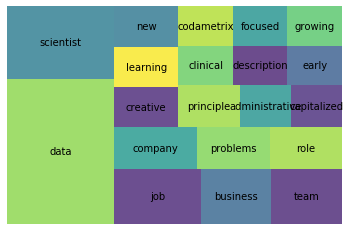

In [70]:
squarify.plot(sizes=top_20_words.values, label=top_20_words.index, alpha=0.8)

plt.axis('off')
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [71]:
tfidf = TfidfVectorizer(stop_words='english', max_features=9202)

dtm = tfidf.fit_transform(df['description'])

docs = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [72]:
docs.head()

,125,17,19000qnz,19001378,19001414,19001518,19001542,1903810,1997,actions,...,wayfair,week,winning,work,working,works,workstreams,world,worldwide,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.26473,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


 # 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [73]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [74]:
nn.kneighbors(dtm.todense()[3])

(array([[0.        , 0.        , 0.        , 1.26714629, 1.33309483]]),
 array([[ 3, 19, 36,  8,  0]]))

In [75]:
random_job_posting =["""Overview:

Through the use of complex data modeling and visualization tools such as Power BI, the Marketing Analyst will report to the Sr. Manager, Affiliate to help understand the stories and insights hidden within the Affiliate channel data. It is essential that this role quickly gain a deep and thorough understanding of the marketing data set and then translate that knowledge into actionable suggestions that are intelligently communicated to Sr. Manager, Affiliate.

Responsibilities:

Support Affiliate Marketing channel leader with ad-hoc analysis, working directly with them to implement strategies based off of results.
Manage daily, weekly and monthly reports for pacing and dialer health.
Monitor and report on A/B testing results.
Utilize data visualization software such as Power BI to effectively communicate performance metrics and insights.
Proactively look for avenues of weakness and strength on a per campaign and subid level.
Assist with the forecasting and tracking of monthly marketing performance vs budget.
Coordinate with reporting teams and IT to operationalize successful analysis processes.
Qualifications:

Bachelor’s degree in Marketing, Economics, Business or related.
Minimum 3 years relevant experience in the responsibilities described.
Capable of balancing multiple projects with the ability to properly prioritize and meet deadlines.
Proficiency in SQL and Excel, as well as either Power BI or Tableau.
Ability to manipulate large unstructured and structured datasets to build insightful solutions to complex problems, and present the results in visually engaging and intuitive reports and dashboards.
Demonstrated ability to communicate effectively to team members.
Strong skill in project management, communications, multi-tasking, and the ability to work independently along with proactively.
Sense of responsibility to self, team and company.
Outstanding integrity, initiative, creativity, and passion.
Strong communications and collaboration skills.
Job Type: Full-time

Experience:

Relevant: 2 years (Preferred)
Tableau / Power BI: 2 years (Preferred)
R / Python: 2 years (Preferred)
SQL: 2 years (Preferred)"""]

In [76]:
new = tfidf.transform(random_job_posting)

nn.kneighbors(new.todense())

(array([[1.2555986 , 1.27295217, 1.31868643, 1.32335526, 1.32436571]]),
 array([[44, 49,  9,  8, 46]]))

In [78]:
df['description'][44]

'Intern, Data Scientist-19000QNZ. No Visa Sponsorship is available for this position. Preferred Qualifications....'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.